In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [8]:
ds=pd.read_csv('Data file.csv')
ds

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [9]:
ds.shape

(209593, 37)

In [10]:
ds.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [12]:
ds.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [13]:
ds.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


<AxesSubplot:>

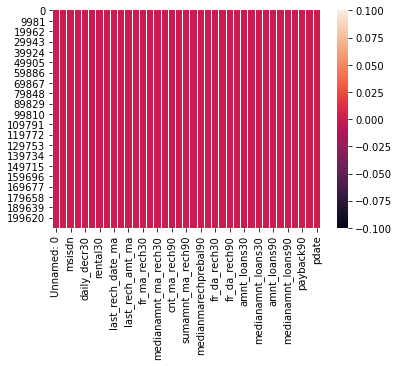

In [14]:
sns.heatmap(ds.isnull())

In [15]:
dfcor=ds.corr()
dfcor

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

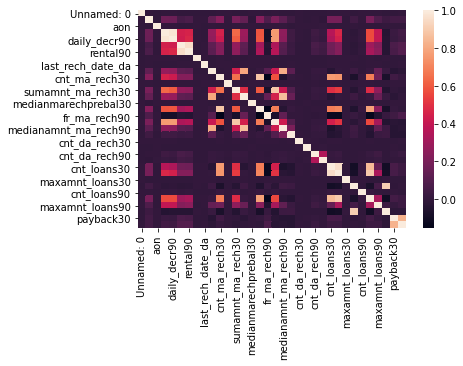

In [16]:
sns.heatmap(dfcor)

its show coreelation

<AxesSubplot:>

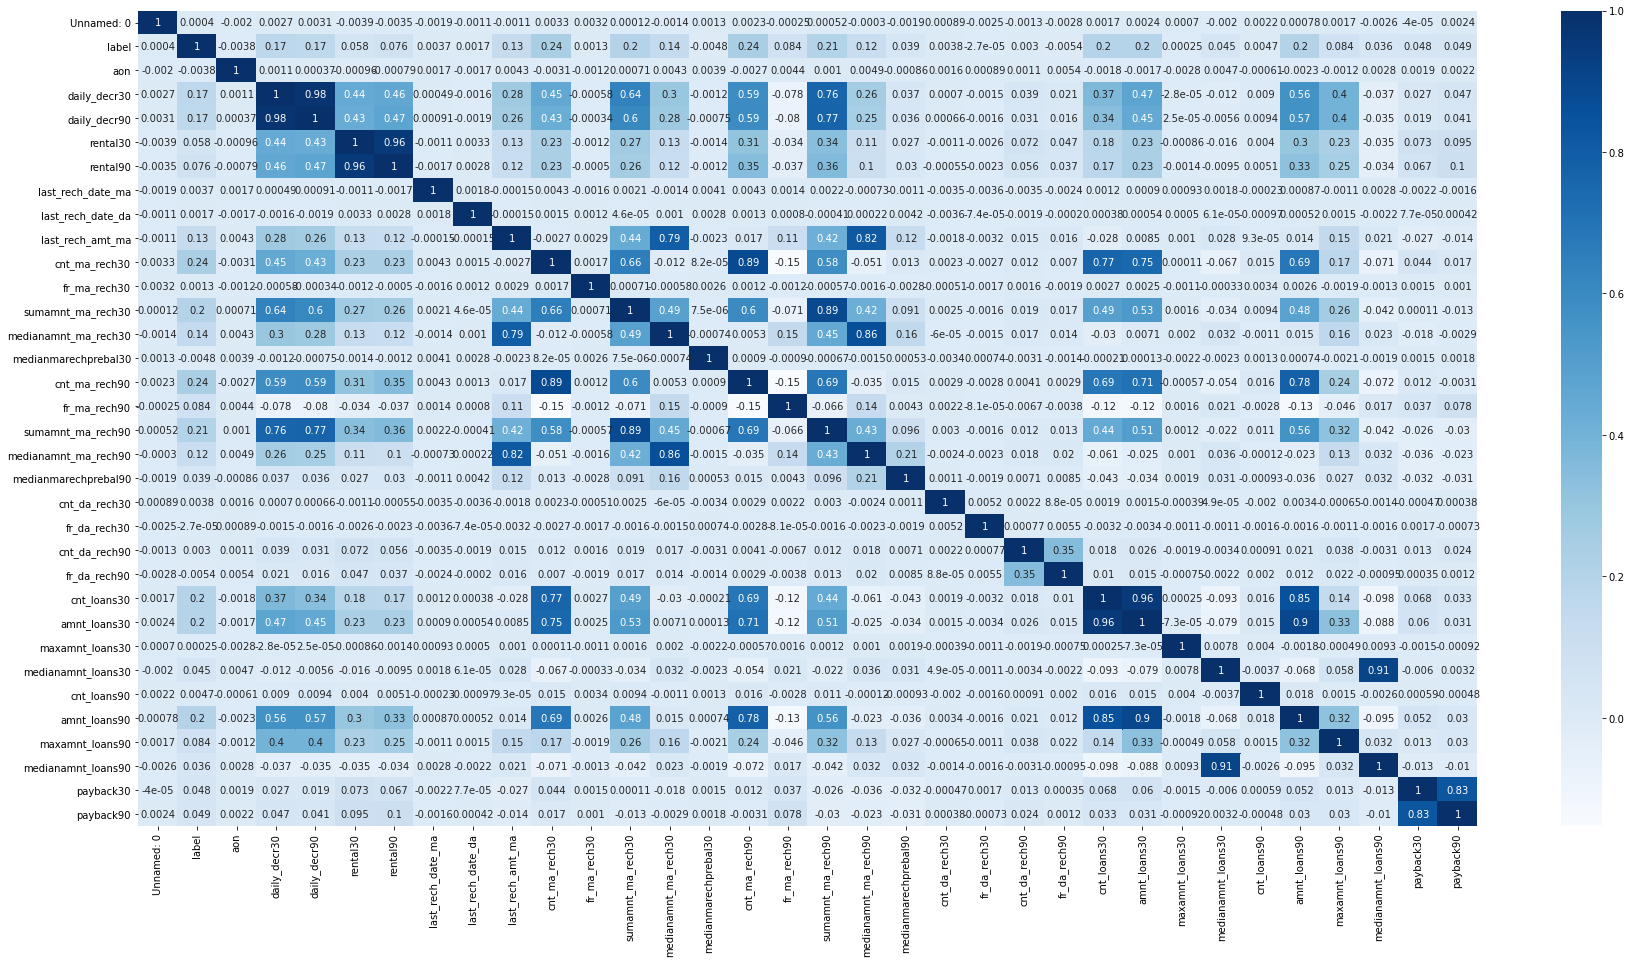

In [17]:
plt.figure(figsize=(30,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# PLOTTING OUTLIERS

In [18]:
ds.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:>

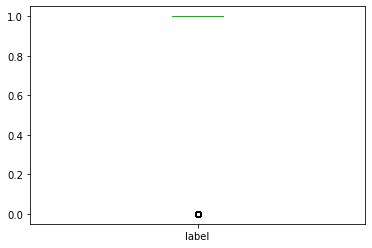

In [19]:
ds['label'].plot.box()

<AxesSubplot:>

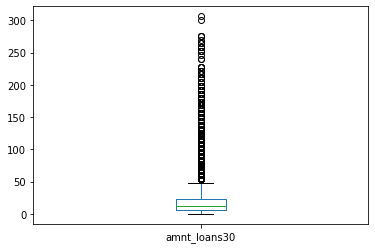

In [20]:
ds['amnt_loans30'].plot.box()

Unnamed: 0                 AxesSubplot(0.125,0.816017;0.133621x0.0639831)
label                   AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
aon                      AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
daily_decr30            AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
daily_decr90            AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
rental30                   AxesSubplot(0.125,0.739237;0.133621x0.0639831)
rental90                AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
last_rech_date_ma        AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
last_rech_date_da       AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
last_rech_amt_ma        AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
cnt_ma_rech30              AxesSubplot(0.125,0.662458;0.133621x0.0639831)
fr_ma_rech30            AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
sumamnt_ma_rech30        AxesSubplot(0.44569,0.662458;0.133621x0.0639831)
medianamnt_ma_rech30    AxesSubplot(0.

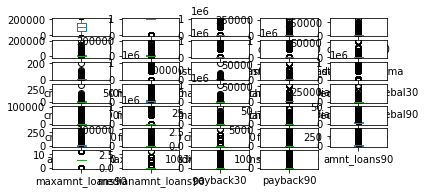

In [21]:
ds.plot(kind='box',subplots=True,layout=(10,5))

removing outliers

In [24]:
import numpy as np

In [25]:
dsnew=ds._get_numeric_data()

In [26]:
dsnew

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [27]:
ds.shape

(209593, 37)

In [28]:
ds.shape

(209593, 37)

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(dsnew))
z

array([[1.73204254, 2.64789583, 0.10357685, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.37765836, 0.09776412, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.37765836, 0.10010243, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.37765836, 0.09378769, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.37765836, 0.08428915, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.37765836, 0.08628398, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [30]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [31]:
z[13][8]

0.06954985220402238

In [32]:
z[15][5]

0.3425219231361389

In [33]:
z[1589][10]

0.24011359278718855

In [34]:
dsnew1=dsnew[(z<3).all(axis=1)]

In [35]:
dsnew1

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [36]:
ds.shape

(209593, 37)

In [37]:
dsnew1.shape

(161465, 34)

In [38]:
dsnew1.describe

<bound method NDFrame.describe of         Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech

In [39]:
x=dsnew1.drop('label',axis=1)
y=dsnew1['label']

In [40]:
from sklearn.tree import tree

In [41]:
from sklearn.tree import DecissionTreeClassifier

ImportError: cannot import name 'DecissionTreeClassifier' from 'sklearn.tree' (C:\Users\CG-DTE\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [ ]:
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=43)
    from sklearn.tree import RandomForestClassifier
    lm=RandomForestClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state",i)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=43)

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.6289692965993544
[[ 6317  1034]
 [18736 27197]]
              precision    recall  f1-score   support

           0       0.25      0.86      0.39      7351
           1       0.96      0.59      0.73     45933

    accuracy                           0.63     53284
   macro avg       0.61      0.73      0.56     53284
weighted avg       0.87      0.63      0.69     53284

